In [ ]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

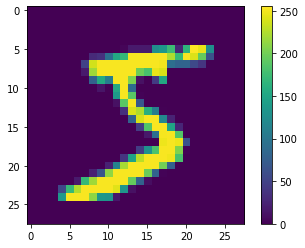

5

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_labels[0]

In [ ]:
import numpy
avged={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for index in range(len(train_images)):
  currimage=train_images[index]
  #print(currimage)
  binmat=numpy.zeros((28,28),dtype="int64")
  for i in range(28):
    for j in range(28):
      #print(currimage)
      count=0
      #binmat[i][j]=int(currimage[i][j])
      if i>0:
        binmat[i][j]+=int(currimage[i-1][j])
        count+=1
      if j>0:
        binmat[i][j]+=int(currimage[i][j-1])
        count+=1
      if i<len(currimage)-1:
        binmat[i][j]+=int(currimage[i+1][j])
        count+=1
      if j<len(currimage[0])-1:
        binmat[i][j]+=int(currimage[i][j+1])
        count+=1
      binmat[i][j]/=count
  avged[int(train_labels[index])].append(binmat)



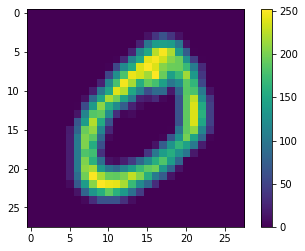

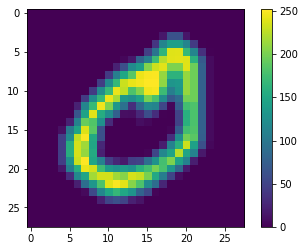

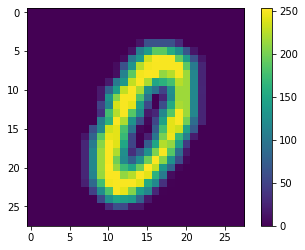

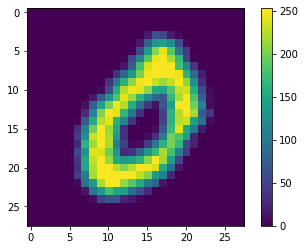

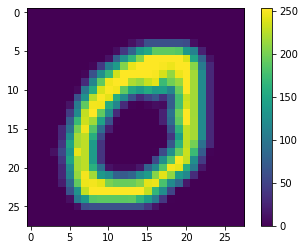

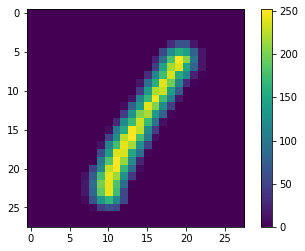

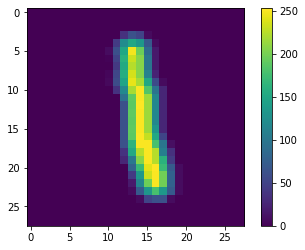

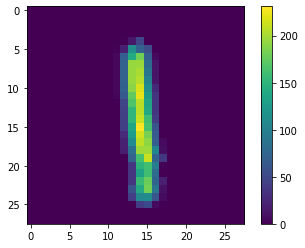

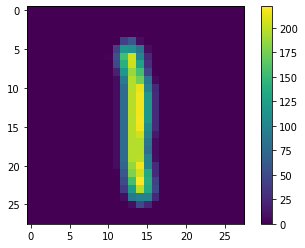

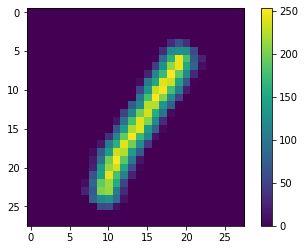

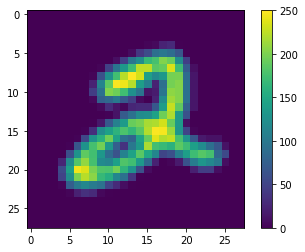

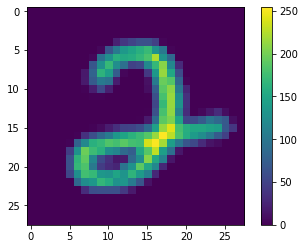

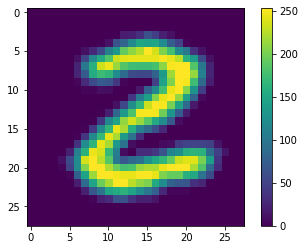

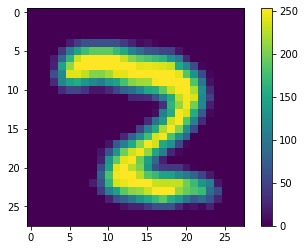

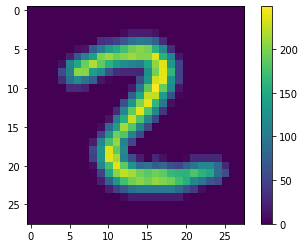

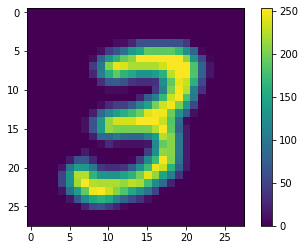

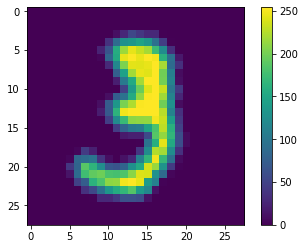

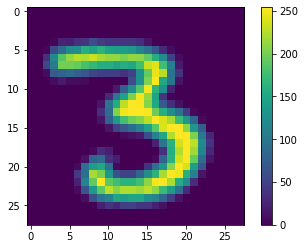

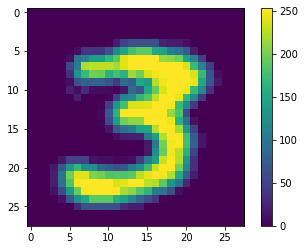

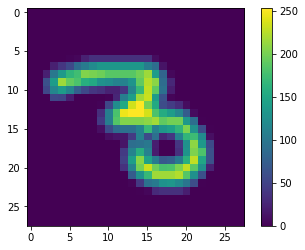

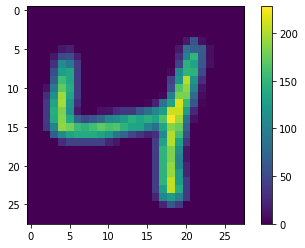

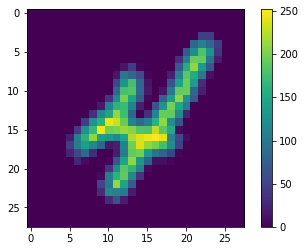

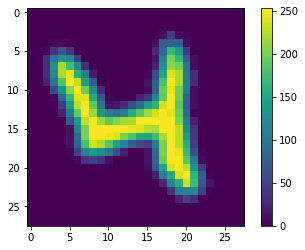

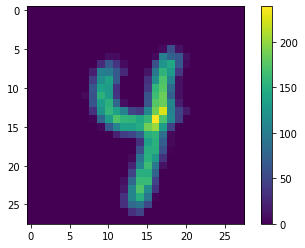

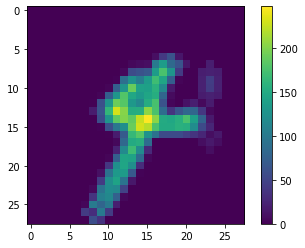

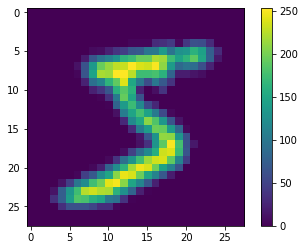

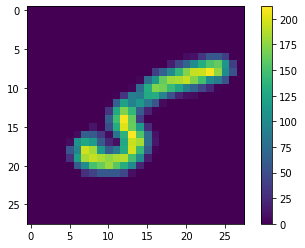

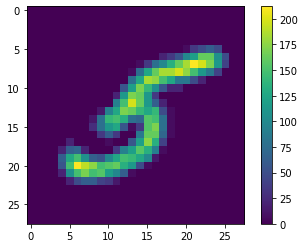

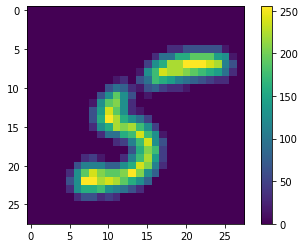

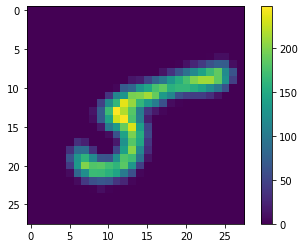

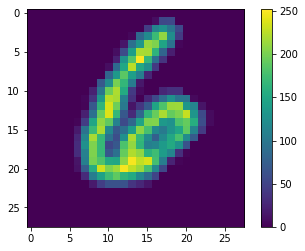

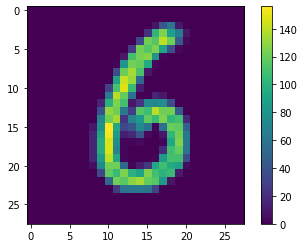

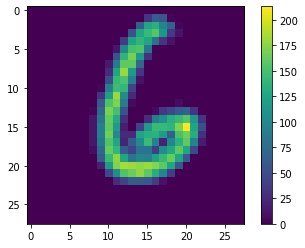

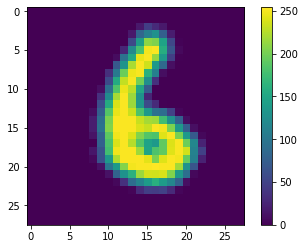

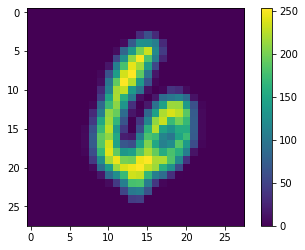

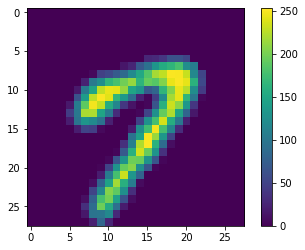

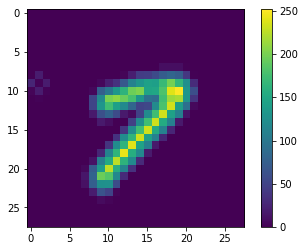

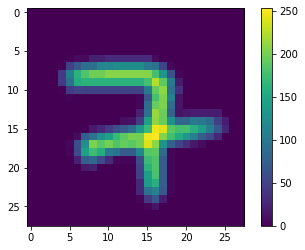

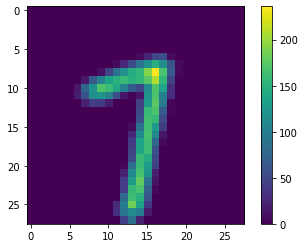

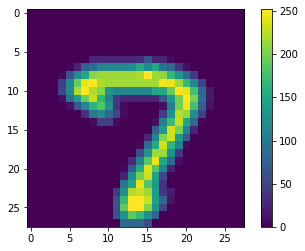

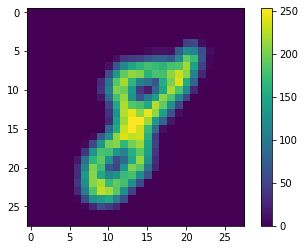

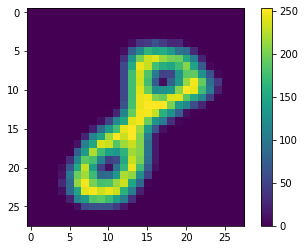

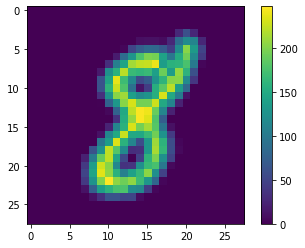

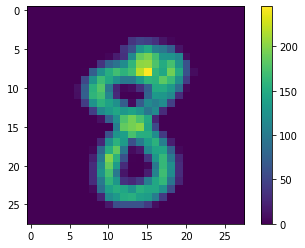

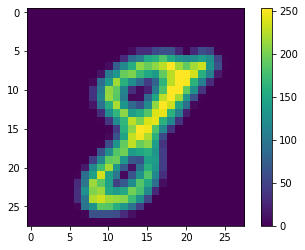

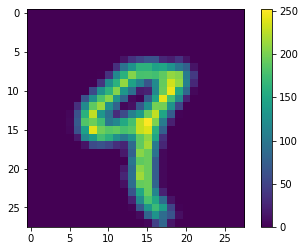

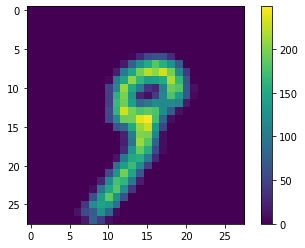

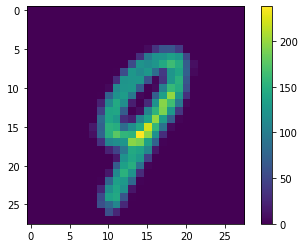

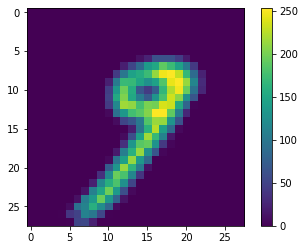

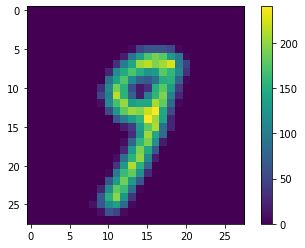

In [ ]:
for i in range(10):
  for j in range(5):
    plt.figure()
    plt.imshow(avged[i][j])
    plt.colorbar()  
    plt.grid(False) 
    plt.show()

In [ ]:
for i in range(10):
  for x in range(28):
    for y in range(28):
      avged[i][x][y]=avged[i][x][y]/200

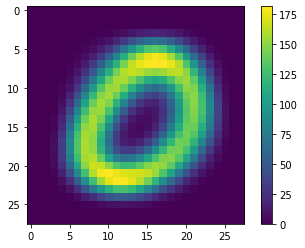

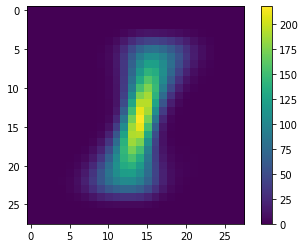

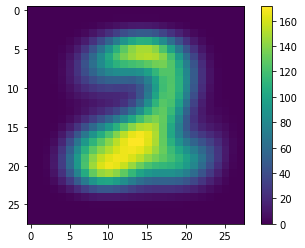

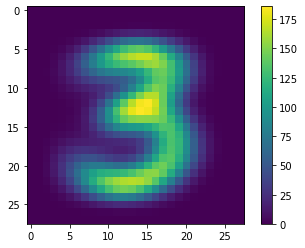

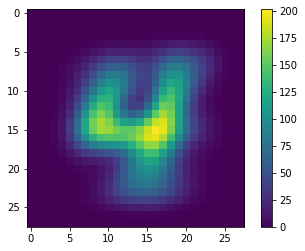

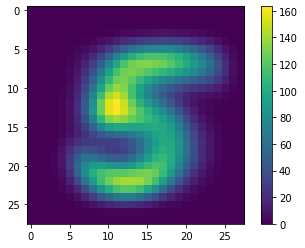

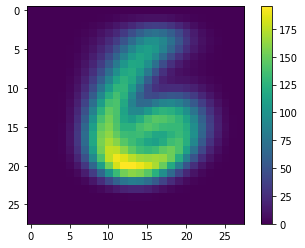

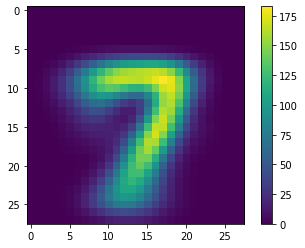

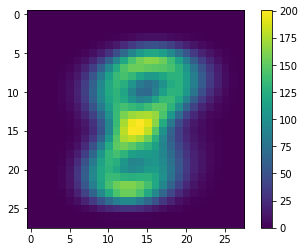

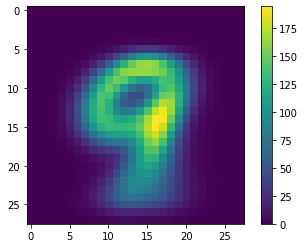

In [ ]:
import numpy
fnlavg={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in range(10):
  sumVal=numpy.zeros((28,28),dtype='int64')
  #print(sumVal)
  for y in range(28):
    for z in range(28):
      for x in range(0,len(avged[i])):
        sumVal[y][z]+=int(avged[i][x][y][z])
    
  sumVal=sumVal/len(avged[i])
  fnlavg[i]=sumVal
  #print(fnlavg[i])
  plt.figure()
  plt.imshow(fnlavg[i])
  plt.colorbar()  
  plt.grid(False) 
  plt.show()
  




       

In [ ]:
correct_count=0
total=len(test_images)
for index in range(len(test_images)):
  image=test_images[index]
  costs=[0,0,0,0,0,0,0,0,0,0]
  for i in range(10):
    for x in range(28):
      for y in range(28):
        costs[i]+=abs(image[x][y]-fnlavg[i][x][y])**2
  minind=0
  minval=costs[0]
  #print(costs)
  for i in range(10):
    if costs[i]<minval:
      minval=costs[i]
      minind=i
  if minind==test_labels[index]:
    correct_count+=1
  #else:
  #  plt.figure()
  #  plt.imshow(image)
  #  plt.colorbar()  
  #  plt.grid(False) 
  #  plt.show()
  #print(str(minind)+" vs "+str(test_labels[index]))
  #print(str(costs[int(test_labels[index])])+" vs "+str(minval))
print(correct_count/total)

0.8167
